# Humanities data-analysis == https://www.humanitiesdataanalysis.org/vector-space-model/notebook.html

## Example work from site for Corpus and language technology course

In [ ]:




#import tokenizer
import nltk
import nltk.tokenize


#import regex
import re

#import collections counter
import collections

#import numpy for mapping
import numpy as np

In [ ]:
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)


In [ ]:
corpus = ["D'où me vient ce désordre, Aufide, et que veut dire",
          "Madame, il était temps qu'il vous vînt du secours:",
          "Ah! Monsieur, c'est donc vous?",
          "Ami, j'ai beau rêver, toute ma rêverie",
          "Ne me parle plus tant de joie et d'hyménée;",
          "Il est vrai, Cléobule, et je veux l'avouer,",
          "Laisse-moi mon chagrin, tout injuste qu'il est;",
          "Ton frère, je l'avoue, a beaucoup de mérite;",
          "J'en demeure d'accord, chacun a sa méthode;",
          'Pour prix de votre amour que vous peignez extrême,']

## BELOW ALL FUNCS

In [ ]:
import re


PUNCT_RE = re.compile(r'[^\w\s]+$')


def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.

    Arguments:
        string (str): a string to check for punctuation markers.

    Returns:
        bool: True is string is a (sequence of) punctuation marker(s),
            False otherwise.

    Examples:
        >>> is_punct("!")
        True
        >>> is_punct("Bonjour!")
        False
        >>> is_punct("¿Te gusta el verano?")
        False
        >>> is_punct("...")
        True
        >>> is_punct("«»...")
        True

    """
    return PUNCT_RE.match(string) is not None

In [ ]:
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    Arguments:
        text (str): a string representing a text.
        language (str): a string specifying the language of text.
        lowercase (bool, optional): Set to True to lowercase all
            word tokens. Defaults to True.

    Returns:
        list: a list of word tokens extracted from text, excluding
            punctuation.

    Examples:
        >>> preprocess_text("Ah! Monsieur, c'est donc vous?", 'french')
        ["ah", "monsieur", "c'est", "donc", "vous"]

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [ ]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)

In [ ]:
def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): A list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix


document_term_matrix = corpus2dtm(tokenized_corpus, vocabulary)

In [ ]:
tokens = nltk.tokenize.word_tokenize(corpus[2], language='french')

# Loop with a standard for-loop
tokenized = []
for token in tokens:
    if not is_punct(token):
        tokenized.append(token)
print(tokenized)

# Loop with a list comprehension
tokenized = [token for token in tokens if not is_punct(token)]
print(tokenized)

In [ ]:
for document in corpus[2:4]:
    print('Original:', document)
    print('Tokenized:', preprocess_text(document, 'french'))

In [ ]:
import collections

vocabulary = collections.Counter()
for document in corpus:
    vocabulary.update(preprocess_text(document, 'french'))

In [ ]:
print(vocabulary.most_common(n=5))

In [ ]:
print('Original vocabulary size:', len(vocabulary))
pruned_vocabulary = {token for token, count in vocabulary.items() if count > 1}
print(pruned_vocabulary)
print('Pruned vocabulary size:', len(pruned_vocabulary))

In [ ]:
n = 5
print('Original vocabulary size:', len(vocabulary))
pruned_vocabulary = {token for token, _ in vocabulary.most_common()[n:]}
print('Pruned vocabulary size:', len(pruned_vocabulary))

In [ ]:
tokenized_corpus = [preprocess_text(document, 'french') for document in corpus]
vocabulary = extract_vocabulary(tokenized_corpus)

In [ ]:
bags_of_words = []
for document in tokenized_corpus:
    tokens = [word for word in document if word in vocabulary]
    bags_of_words.append(collections.Counter(tokens))

print(bags_of_words[2])

In [ ]:
import numpy as np

document_term_matrix = np.array(document_term_matrix)
print(document_term_matrix.shape)

In [ ]:
import os
import lxml.etree
import tarfile

tf = tarfile.open('data/03-vector-space-model/data/theatre-classique.tar.gz', 'r')
tf.extractall('data')

subgenres = ('Comédie', 'Tragédie', 'Tragi-comédie')

plays, titles, genres = [], [], []
for fn in os.scandir('data/03-vector-space-model/data/theatre-classique/'):
    # Only include XML files
    if not fn.name.endswith('.xml'):
        continue
    tree = lxml.etree.parse(fn.path)
    genre = tree.find('//genre')
    title = tree.find('//title')
    if genre is not None and genre.text in subgenres:
        lines = []
        for line in tree.xpath('//l|//p'):
            lines.append(' '.join(line.itertext()))
        text = '\n'.join(lines)
        plays.append(text)
        genres.append(genre.text)
        titles.append(title.text)

In [ ]:
import matplotlib.pyplot as plt

counts = collections.Counter(genres)

fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values(), width=0.3)
ax.set(xlabel="genre", ylabel="count");

In [34]:
print("Running..")
plays_tok = [preprocess_text(play, 'french') for play in plays]
vocabulary = extract_vocabulary(plays_tok, min_count=2)
document_term_matrix = np.array(corpus2dtm(plays_tok, vocabulary))

print(f"document-term matrix with "
      f"|D| = {document_term_matrix.shape[0]} documents and "
      f"|V| = {document_term_matrix.shape[1]} words.")

Running..
document-term matrix with |D| = 498 documents and |V| = 48047 words.


In [38]:
monsieur_idx = vocabulary.index('monsieur')
sang_idx = vocabulary.index('sang')

monsieur_counts = document_term_matrix[:, monsieur_idx]
sang_counts = document_term_matrix[:, sang_idx]
print(monsieur_idx)
print(sang_idx)

27899
40503


In [42]:
genres = np.array(genres)

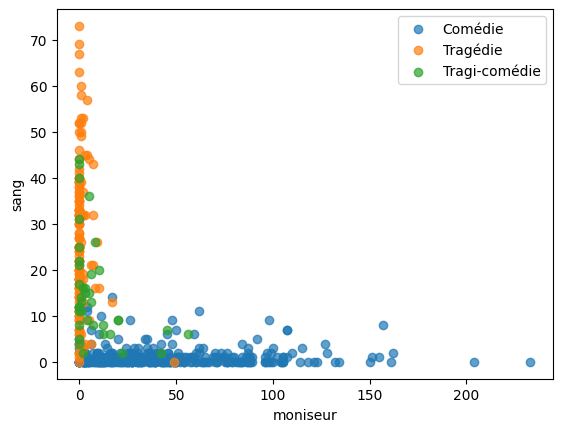

In [43]:
fig, ax = plt.subplots()

for genre in ('Comédie', 'Tragédie', 'Tragi-comédie'):
    ax.scatter(monsieur_counts[genres == genre],
    sang_counts[genres == genre],
    label = genre, alpha = 0.7)

ax.set(xlabel='moniseur', ylabel='sang')
plt.legend()